In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

### Attribute information:

* age: age of the policyholder
* sex: gender of the policyholder
* bmi: Body Mass Index of the policyholder
* children: number of children of the policyholder
* smoker: whether the policyholder is a smoker or not
* region: region where the policyholder belongs to
* charges: premium charged to the policyholder
 

In [74]:
df = pd.read_csv("insurance.csv")
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=10)

There are 1338 rows and 7 columns.


,age,sex,bmi,children,smoker,region,charges
559,19,male,35.530,0,no,northwest,1646.42970
1087,57,male,31.540,0,no,northwest,11353.22760
1020,51,male,37.000,0,no,southwest,8798.59300
460,49,female,36.630,3,no,southeast,10381.47870
802,21,male,22.300,1,no,southwest,2103.08000
298,31,male,34.390,3,yes,northwest,38746.35510
481,49,male,37.510,2,no,southeast,9304.70190
616,56,female,28.595,0,no,northeast,11658.11505
763,27,male,26.030,0,no,northeast,3070.80870
750,37,female,26.400,0,yes,southeast,19539.24300


In [8]:
df['charges'].isnull().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


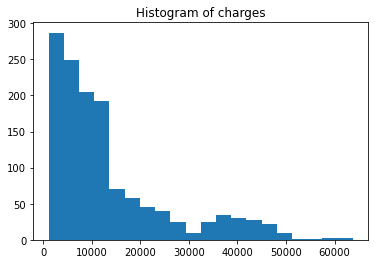

/Users/varathm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


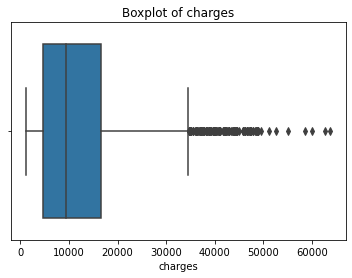

In [13]:
plt.hist(df['charges'], 20)
plt.title('Histogram of charges')
plt.show()

sns.boxplot(df['charges'])
plt.title('Boxplot of charges')
plt.show()

In [24]:
df[df['children']==0]['smoker'].count()

574

In [25]:
574/1338

0.4289985052316891

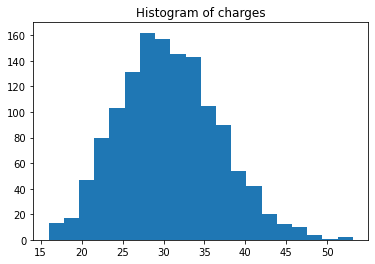

/Users/varathm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


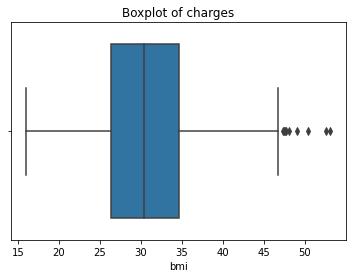

In [26]:
plt.hist(df['bmi'], 20)
plt.title('Histogram of charges')
plt.show()

sns.boxplot(df['bmi'])
plt.title('Boxplot of charges')
plt.show()

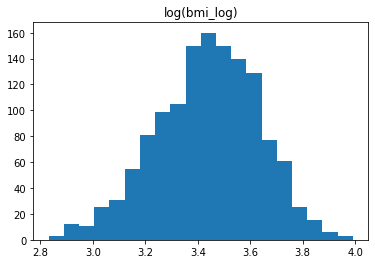

/Users/varathm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


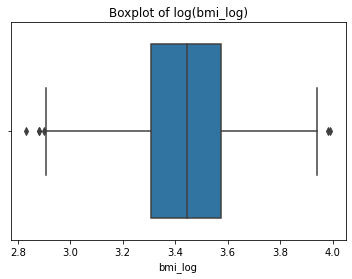

In [31]:
df['bmi_log'] = np.log(df['bmi']+1)

plt.hist(df['bmi_log'], 20)
plt.title('log(bmi_log)')
plt.show()

sns.boxplot(df['bmi_log'])
plt.title('Boxplot of log(bmi_log)')
plt.show()

In [56]:
df[['region','charges']].groupby('region').median()['charges'].sort_values(ascending=False)

KeyError: "None of [Index(['region', 'charges'], dtype='object')] are in the [columns]"

In [35]:
df[['age','charges']].corr()

,age,charges
age,1.000000,0.299008
charges,0.299008,1.000000


,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [76]:
df = pd.get_dummies(df,columns=['region', 'smoker','sex'], drop_first=True)
df.sample(10)

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,smoker_yes,sex_male
231,59,27.830,3,14001.28670,0,1,0,0,0
116,58,49.060,0,11381.32540,0,1,0,0,1
1214,27,31.255,1,3956.07145,1,0,0,0,0
481,49,37.510,2,9304.70190,0,1,0,0,1
170,63,41.470,0,13405.39030,0,1,0,0,1
985,44,25.800,1,7624.63000,0,0,1,0,0
540,34,38.000,3,6196.44800,0,0,1,0,0
765,57,31.825,0,11842.62375,1,0,0,0,0
86,57,31.160,0,43578.93940,1,0,0,1,0
768,64,39.700,0,14319.03100,0,0,1,0,0


In [86]:
X=df.drop(['charges'],axis=1)
y = df['charges']


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [110]:
#Build Model
lm = LinearRegression()
lm.fit(X_train,y_train)
X_train.columns

Index(['age', 'bmi', 'children', 'region_northwest', 'region_southeast',
       'region_southwest', 'smoker_yes', 'sex_male'],
      dtype='object')

In [111]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lm.coef_[idx]))

The coefficient for age is 251.68186514630264
The coefficient for bmi is 322.3891068370298
The coefficient for children is 344.9642552960665
The coefficient for region_northwest is -304.0900976542844
The coefficient for region_southeast is -939.3420969057231
The coefficient for region_southwest is -868.1885586576784
The coefficient for smoker_yes is 24059.390476923378
The coefficient for sex_male is -282.79634660879907


In [112]:
intercept = lm.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -11039.238418561557


In [113]:
lm.score(X_train,y_train)

0.7545557492633161

In [114]:
coef_df = pd.DataFrame(
    np.append(lm.coef_, lm.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
age,251.681865
bmi,322.389107
children,344.964255
region_northwest,-304.090098
region_southeast,-939.342097
region_southwest,-868.188559
smoker_yes,24059.390477
sex_male,-282.796347
Intercept,-11039.238419


In [115]:
# to check model performance
from sklearn.metrics import mean_squared_error

predictions = lm.predict( X_test)

# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 4139.9320647660115
MSE: 36761456.352013245
RMSE: 6063.122656850449
